# <font color =   #0000cc> <i> Clase 8 Programación I MCD

## <font color= #0000FF> <i> Sockets: Estableciendo una conexión Cliente-Servidor

Cuando queremos obtener o enviar información a un servidor, podemos utilizar un **modelo cliente-servidor**.

Las partes que componen este modelo son:

**Cliente:** Programa que solicita y recibe información de un servidor

**Servidor:** Programa que recibe y procesa las peticiones de diferentes clientes

**Sockets:** Habilitan el envío y la recepción de información entre ambos.

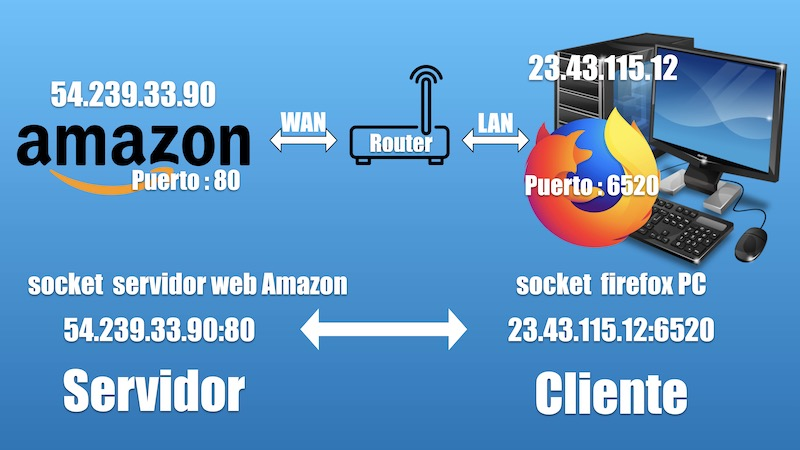

In [ ]:
from IPython.display import Image
Image("estructura-cliente-servidor.jpg", width=500,height=500)

Imágen tomada de: https://naseros.com/2020/05/29/que-es-un-puerto-y-un-socket/

Video breve explicación Modelo Cliente-Servidor https://www.youtube.com/watch?v=KA7Ngcgth0Q

### <font color= #33691e> <i> Creando el programa para el servidor

Para configurar tanto al servidor como al cliente, es necesario determinar **el número de puerto a utilizar**

Un puerto es un número que se le asigna a cada una de las aplicaciones que utilizamos:
**0 al 1023** asignados solamente por superusuarios (root)
**1024 al 49151** los asigna un organismo internacional a las aplicaciones y sevicios desarrollados por diferentes empresas
**49152 al 65535** asignados temporalmente por las aplicaciones.

El puerto 8000 está asignado para utilizar el **protocolo de control de transmisión (TCP)** que garantiza la entrega de
paquetes de datos en el mismo órden en la que fueron enviados. https://www.youtube.com/watch?v=1pB2kan_AFk

<b> <font color= #990000 > <i> Utilizando Sublime Text crea un archivo que se llame servidor.py y copia el siguiente código en él

<b> <i> Nota importante: No correr aquí este código

### <font color= #33691e> <i> Creando el programa para el cliente

<b> <font color= #990000 > <i> Utilizando Sublime Text crea un archivo que se llame cliente.py y copia el siguiente código en él

<b> <i> Nota importante: No correr aquí este código

<b> Una vez habiendo creado los dos archivos, abrimos dos consolas de powershell de Anaconda

<b> En una consola corremos el archivo servidor.py


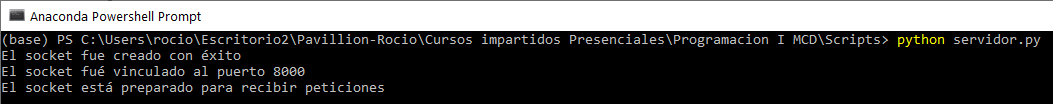

In [ ]:
from IPython.display import Image
Image("servidor.png", width=900,height=300)

<b> Y en la otra, el archivo cliente.py

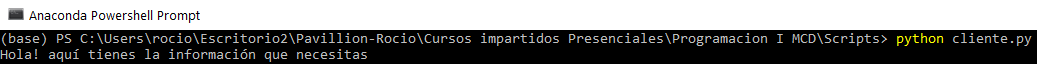

In [ ]:
from IPython.display import Image
Image("cliente.png", width=900,height=300)

Y vemos cómo el servidor nos envía el texto "Hola! Aquí tienes la información que necesitas"

Si vamos a la pantalla en la que corrimos el archivo del servidor, veremos que la conexión ya se cerró

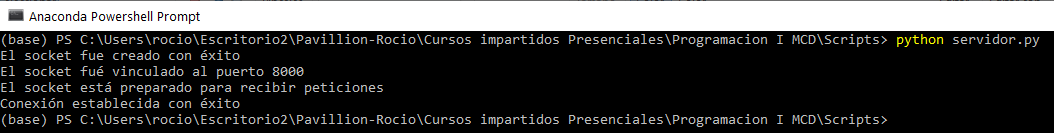

In [ ]:
from IPython.display import Image
Image("cierre de la conexión.png", width=900,height=300)

<b> <i> <font color=  #FF6600 > Ejercicio 1

Crea tus propios scripts de servidor y cliente utilizando el puerto 8001, y envía al cliente la leyenda
"Información enviada con éxito! Gracias por su preferencia".

## <font color= #0000FF> <i> WEB Scraping

 Web scraping es la **extracción de datos** de una o varias Páginas Web para su posterior análisis


Algunas aplicaciones del Web scraping son:

-Alimentar una base de datos

-Monitorear precios ofrecidos por la competencia

-Conocer el stock de productos en diferentes sucursales

-Detectar lanzamientos y novedades.


Antes de llevar a cabo este tipo de recolección de datos, es importante leer los términos legales de la Web a la que queremos accesar para no incurrir en alguna falta.

Si tenemos dudas acerca de los términos legales, es mejor contactar a la empresa.

<b> <i> No debemos violar los derechos de autor, de propiedad intelectual o de uso de una marca registrada.

<b> <i>No está permitida la competencia desleal (imitación, publicidad comparativa, violación de secretos, etc...).




### <font color= #33691e> <i> Obteniendo información de un archivo HTML

Vamos a obtener la información acerca de los casos de Covid que se encuentra desplegada dentro de la tabla del sitio Web "worldometer".

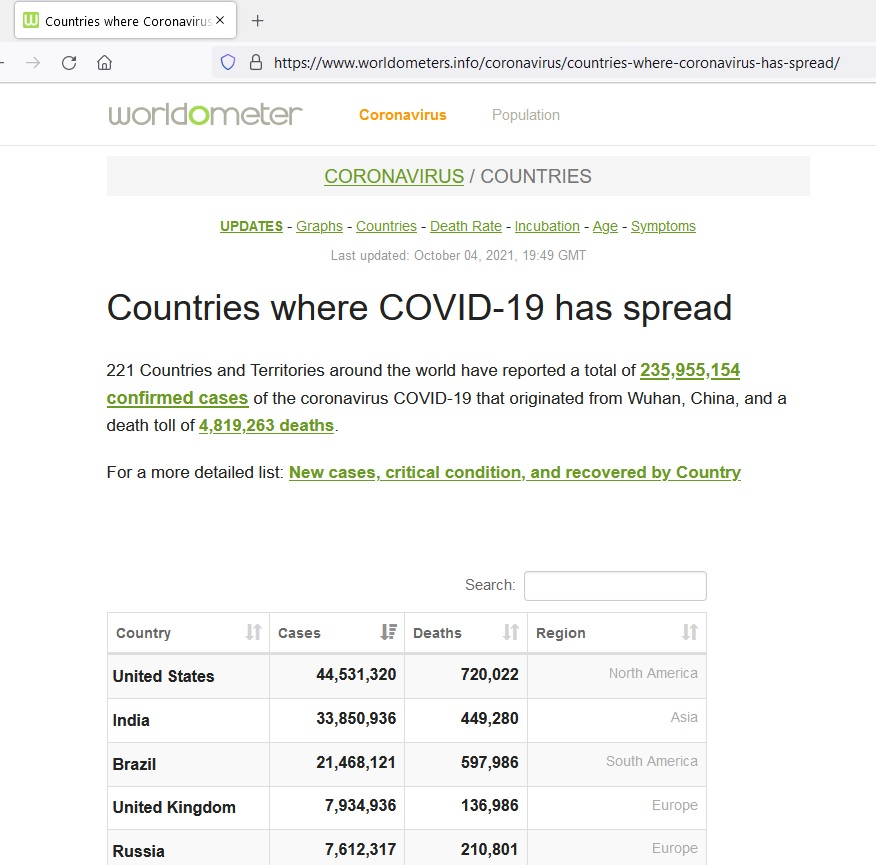

In [ ]:
from IPython.display import Image
Image("Sitio Web Covid.jpg", width=500,height=800)

Una vez en la página Web, podemos dar clic en el botón derecho del mouse para ver el código

Revisamos como es que está formada la tabla que contiene la información que nos interesa

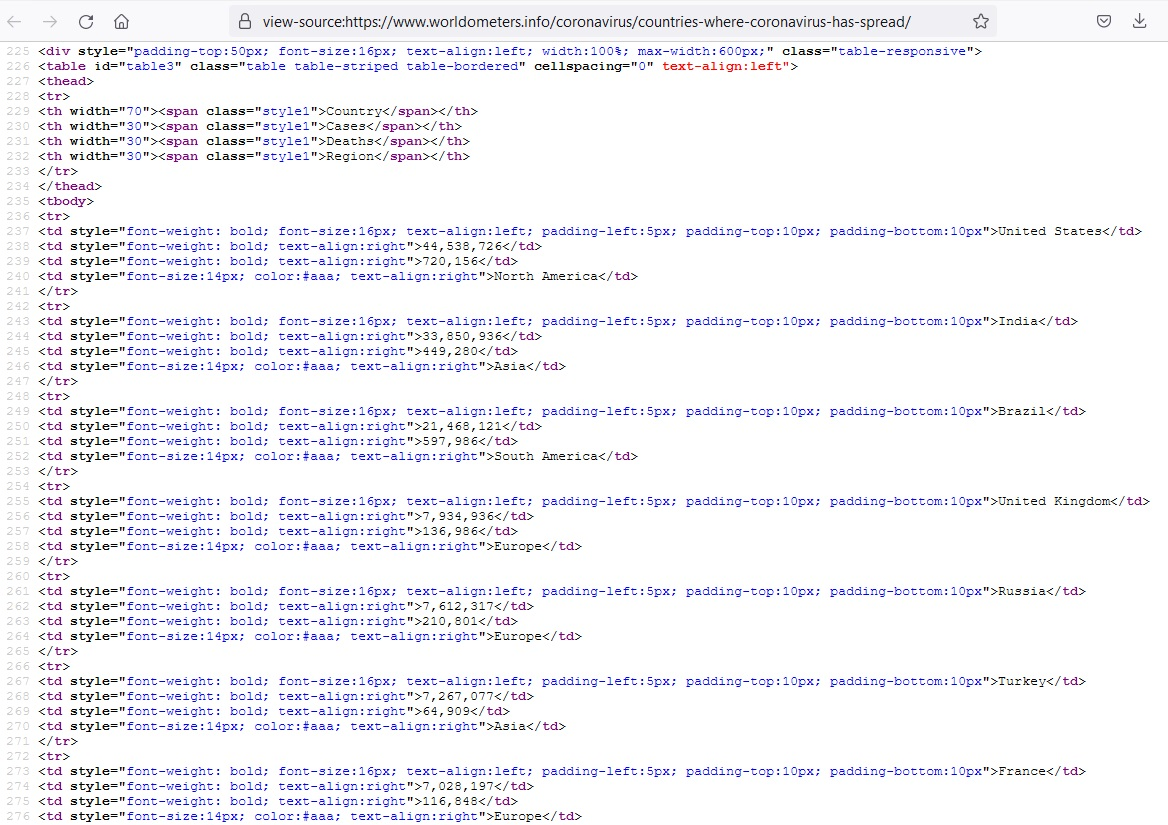

In [ ]:
from IPython.display import Image
Image("Tabla de Covid.jpg", width=500,height=800)

Y podemos ver que la tabla está formada por medio de las etiquetas <b> "td"

Ya que sabemos como podemos identificar las partes de nuestro interés, podemos comenzar a crear nuestro script en python


In [ ]:
import requests     #instalar desde el prompt con pip install requests

# Beautifulsoup es una librería que permite analizar y recorrer la información de un archivo que contiene etiquetas
# las cuales forman un árbol

from bs4 import BeautifulSoup #instalar desde el prompt con pip install bs4

import lxml        #instalar desde el prompt con pip install lxml
import texttable as tt     #instalar desde el prompt con pip install texttable

In [ ]:

# URL para extraer datos
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

# accedemos al URL
page = requests.get(url)

#Le indicamos que el texto del objeto "page" es de tipo html
soup = BeautifulSoup(page.text, 'html.parser')

#Creamos una lista vacía para almacenar los datos
data = []

# soup.find_all('td') traerá cada
# elemento en la tabla de la URL que se encuentren entre un tag "td"
# que son los que se usan para crear tablas en HTML

# data_iterator es el iterador de la tabla
data_iterator = iter(soup.find_all('td')) #Retorna uniterator


# Este ciclo seguirá repitiéndose hasta que haya
# datos disponibles en el iterador
while True:
    try:
        pais = next(data_iterator).text
        casos_confirmados = next(data_iterator).text
        muertes = next(data_iterator).text
        region = next(data_iterator).text

        data.append((
            pais,
            int(casos_confirmados.replace(',', '')),
            int(muertes.replace(',', '')),
            region
        ))

    # El error StopIteration se genera cuando
    # no quedan más elementos para
    # iterar break sale del bucle.
    except StopIteration:
        break


data


[('United States', 99898460, 1100126, 'North America'),
 ('India', 44666759, 530531, 'Asia'),
 ('France', 37127173, 157704, 'Europe'),
 ('Germany', 36033394, 155588, 'Europe'),
 ('Brazil', 34955820, 688738, 'South America'),
 ('South Korea', 26194229, 29665, 'Asia'),
 ('United Kingdom', 23954192, 195530, 'Europe'),
 ('Italy', 23823192, 179985, 'Europe'),
 ('Japan (+Diamond Princess)', 23179422, 47592, 'Asia'),
 ('Russia', 21499952, 391024, 'Europe'),
 ('Turkey', 16976729, 101327, 'Asia'),
 ('Spain', 13551539, 115357, 'Europe'),
 ('Vietnam', 11508689, 43166, 'Asia'),
 ('Australia', 10479214, 15870, 'Australia/Oceania'),
 ('Argentina', 9720232, 130003, 'South America'),
 ('Netherlands', 8528515, 22870, 'Europe'),
 ('Taiwan', 8034295, 13562, 'Asia'),
 ('Iran', 7558950, 144612, 'Asia'),
 ('Mexico', 7116424, 330430, 'North America'),
 ('Indonesia', 6561504, 159104, 'Asia'),
 ('Poland', 6346312, 118210, 'Europe'),
 ('Colombia', 6311359, 141862, 'South America'),
 ('Portugal', 5531172, 25339,

In [ ]:
type(data)

list

In [ ]:

# Ordenar los datos por el número de casos confirmados
data.sort(key = lambda row: row[1], reverse = True) #Función anónima lambda


# Creamos un objeto texttable
# (módulos básicos de Python para leer y escribir tablas de texto en código ASCII)
table = tt.Texttable()

# Agrega una fila vacía al principio para los encabezados
table.add_rows([(None, None, None, None)] + data)

# Colocamos todas las columnas con alineado centrado
table.set_cols_align(('c', 'c', 'c', 'c'))

#Colocamos los nombres de las columnas en la fila vacía
table.header((' Pais ', ' Numero de Casos ', ' Muertes ', ' Continente '))

#Imprimimos la tabla
print(table.draw())


+--------------------------+-------------------+-----------+-------------------+
|           Pais           |  Numero de Casos  |  Muertes  |     Continente    |
+==========================+===================+===========+===================+
|      United States       |     99898328      |  1100126  |   North America   |
+--------------------------+-------------------+-----------+-------------------+
|          India           |     44666759      |  530531   |       Asia        |
+--------------------------+-------------------+-----------+-------------------+
|          France          |     37127173      |  157704   |      Europe       |
+--------------------------+-------------------+-----------+-------------------+
|         Germany          |     36033394      |  155588   |      Europe       |
+--------------------------+-------------------+-----------+-------------------+
|          Brazil          |     34954680      |  688735   |   South America   |
+--------------------------+

Si quisiéramos guardar esta información como un csv en nuestra computadora

In [ ]:
import pandas as pd

data_df = pd.DataFrame (data, columns = [' Pais ', ' Numero de Casos ', ' Muertes ', ' Continente '])

data_df

,Pais,Numero de Casos,Muertes,Continente
0,United States,99898328,1100126,North America
1,India,44666759,530531,Asia
2,France,37127173,157704,Europe
3,Germany,36033394,155588,Europe
4,Brazil,34954680,688735,South America
...,...,...,...,...
224,Wallis & Futuna,761,7,Australia/Oceania
225,Niue,87,0,Australia/Oceania
226,Holy See,29,0,Europe
227,Western Sahara,10,1,Africa


In [ ]:
data_df.to_csv("Casos_Covid.csv", index=False)

<b> <i> Qué hace Beautiful Soup?

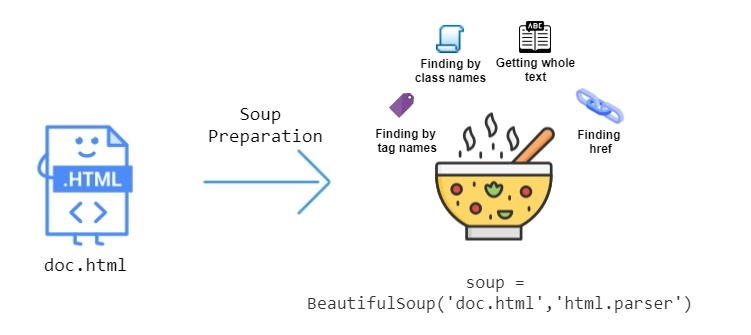

In [ ]:
from IPython.display import Image
Image("soup.jpg", width=500,height=300)

Imágen tomada de: https://stackabuse.com/guide-to-parsing-html-with-beautifulsoup-in-python/

#### <b> <font color= #990000 > <i> Obteniendo diferentes componentes de uns página web

<b> Título de la Página

In [ ]:
title=soup.title
print(title.prettify())

<title>
 Countries where Coronavirus has spread - Worldometer
</title>



<b> Todas las etiquetas que comiencen con "a"

In [ ]:
etiq_a = soup.find_all('a')
etiq_a

[<a class="navbar-brand" href="/"><img border="0" src="/img/worldometers-logo.gif" title="Worldometer"/></a>,
 <a href="/coronavirus/">Coronavirus</a>,
 <a href="/population/">Population</a>,
 <a href="/coronavirus/">Coronavirus</a>,
 <a href="/coronavirus/"><strong>UPDATES</strong></a>,
 <a href="/coronavirus/coronavirus-cases/"> </a>,
 <a href="/coronavirus/worldwide-graphs/">Graphs</a>,
 <a href="/coronavirus/#countries">Countries</a>,
 <a href="/coronavirus/coronavirus-death-rate/">Death Rate</a>,
 <a href="/coronavirus/coronavirus-incubation-period/">Incubation</a>,
 <a href="/coronavirus/coronavirus-age-sex-demographics/">Age</a>,
 <a href="/coronavirus/coronavirus-symptoms/">Symptoms</a>,
 <a href="/coronavirus/">640,311,387 confirmed cases</a>,
 <a href="/coronavirus/coronavirus-death-toll/"><strong>6,615,337 deaths</strong></a>,
 <a href="/coronavirus/#countries"><strong>New cases, critical condition, and recovered by Country </strong></a>,
 <a href="/coronavirus/"><strong>Cor

<b> Desplegando todo el texto del sitio Web

In [ ]:
soup.get_text() #Devuelve el texto dentro de la etiqueta.

"\n\n\n\n  \n\n\n\n\nCountries where Coronavirus has spread - Worldometer\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCoronavirus\nPopulation\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\nCoronavirus / Countries\nUPDATES -  Graphs - Countries - Death Rate  - Incubation - Age - Symptoms\nLast updated: November 13, 2022, 23:38 GMT\nCountries where COVID-19 has spread \n\n228 Countries and Territories around the world have reported a total of 640,311,387 confirmed cases of the coronavirus COVID-19 that originated from Wuhan, China, and a death toll of 6,615,337 deaths.\n        For a more detailed list: New cases, critical condition, and recovered by Country \n\n\n\n\n\n\nCountry\nCases\nDeaths\nRegion\n\n\n\n\nUnited States\n99,898,328\n1,100,126\nNorth America\n\n\nIndia\n44,666,759\n530,531\nAsia\n\n\nFrance\n37,127,173\n157,704\nEurope\n\n\nGermany\n36,033,394\n155,588\nEurope\n\n\nB

In [ ]:
soup.get_text(strip=True) #Extrae el texto sin etiquetas


"Countries where Coronavirus has spread - WorldometerCoronavirusPopulationCoronavirus/ CountriesUPDATES-Graphs-Countries-Death Rate-Incubation-Age-SymptomsLast updated: October 04, 2021, 22:12 GMTCountries where COVID-19 has spread221Countries and Territories around the world have reported a total of236,052,637 confirmed casesof the coronavirus COVID-19 that originated from Wuhan, China, and a death toll of4,820,611 deaths.For a more detailed list:New cases, critical condition, and recovered by CountryCountryCasesDeathsRegionUnited States44,608,220720,991North AmericaIndia33,851,005449,283AsiaBrazil21,478,546598,152South AmericaUnited Kingdom7,934,936136,986EuropeRussia7,612,317210,801EuropeTurkey7,267,07764,909AsiaFrance7,028,197116,848EuropeIran5,638,735121,347AsiaArgentina5,260,719115,283South AmericaSpain4,965,39986,527EuropeColombia4,963,243126,425South AmericaItaly4,683,646131,068EuropeGermany4,264,98294,342EuropeIndonesia4,220,206142,261AsiaMexico3,681,960278,801North AmericaPol

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Countries where Coronavirus has spread - Worldometer
  </title>
  <meta content="Where is Coronavirus in the world? List of countries with confirmed cases and deaths (total cumulative number) due to the novel coronavirus COVID-19" name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x76

### <font color= #33691e> <i> Obteniendo información de un archivo JSON

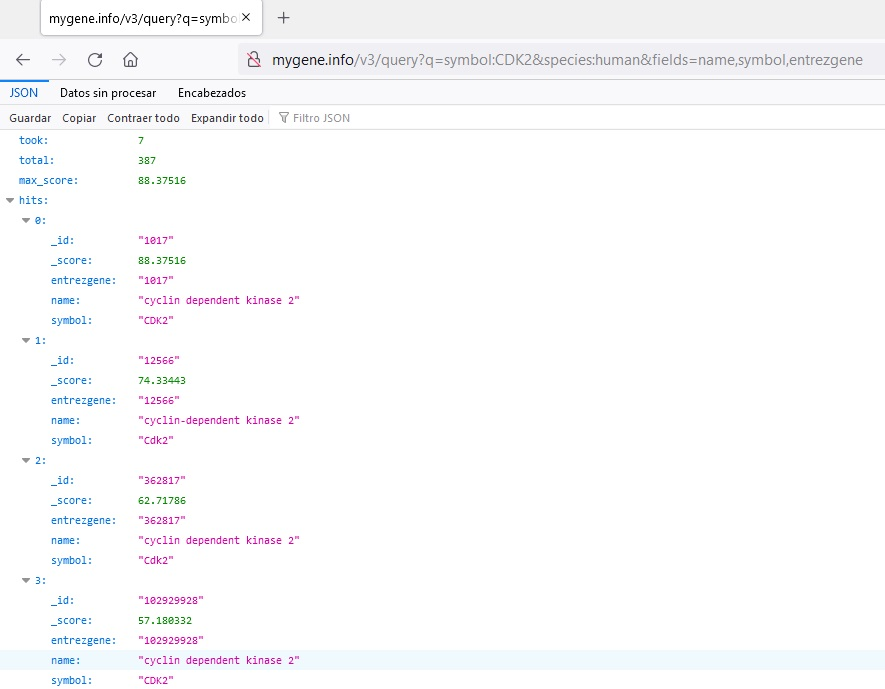

In [ ]:
from IPython.display import Image
Image("info_genes.jpg", width=500,height=800)

In [ ]:
#from urllib import request

import json

url = 'http://mygene.info/v3/query?q=symbol:CDK2&species:human&fields=name,symbol,entrezgene'

#html = request.urlopen(url).read()

# accedemos al URL
info_genes = requests.get(url)

info_genes.text

'{"took":6,"total":442,"max_score":17.782005,"hits":[{"_id":"1017","_score":17.782005,"entrezgene":"1017","name":"cyclin dependent kinase 2","symbol":"CDK2"},{"_id":"12566","_score":14.913939,"entrezgene":"12566","name":"cyclin-dependent kinase 2","symbol":"Cdk2"},{"_id":"362817","_score":12.619488,"entrezgene":"362817","name":"cyclin dependent kinase 2","symbol":"Cdk2"},{"_id":"107325763","_score":11.472261,"entrezgene":"107325763","name":"cyclin dependent kinase 2","symbol":"CDK2"},{"_id":"101933939","_score":11.472261,"entrezgene":"101933939","name":"cyclin dependent kinase 2","symbol":"CDK2"},{"_id":"103189561","_score":11.472261,"entrezgene":"103189561","name":"cyclin-dependent kinase 2","symbol":"cdk2"},{"_id":"103238495","_score":11.472261,"entrezgene":"103238495","name":"cyclin dependent kinase 2","symbol":"CDK2"},{"_id":"ENSGACG00000000539","_score":11.472261,"name":"cyclin-dependent kinase 2","symbol":"cdk2"},{"_id":"ENSHHUG00000018828","_score":11.472261,"name":"cyclin-depen

In [ ]:
soup2 = BeautifulSoup(info_genes.text,'html.parser')

#Organizamos la información sabiendo que se trata de un archivo tipo JSON
genes_organizado=json.loads(soup2.text)
genes_organizado

{'took': 6,
 'total': 442,
 'max_score': 17.782005,
 'hits': [{'_id': '1017',
   '_score': 17.782005,
   'entrezgene': '1017',
   'name': 'cyclin dependent kinase 2',
   'symbol': 'CDK2'},
  {'_id': '12566',
   '_score': 14.913939,
   'entrezgene': '12566',
   'name': 'cyclin-dependent kinase 2',
   'symbol': 'Cdk2'},
  {'_id': '362817',
   '_score': 12.619488,
   'entrezgene': '362817',
   'name': 'cyclin dependent kinase 2',
   'symbol': 'Cdk2'},
  {'_id': '107325763',
   '_score': 11.472261,
   'entrezgene': '107325763',
   'name': 'cyclin dependent kinase 2',
   'symbol': 'CDK2'},
  {'_id': '101933939',
   '_score': 11.472261,
   'entrezgene': '101933939',
   'name': 'cyclin dependent kinase 2',
   'symbol': 'CDK2'},
  {'_id': '103189561',
   '_score': 11.472261,
   'entrezgene': '103189561',
   'name': 'cyclin-dependent kinase 2',
   'symbol': 'cdk2'},
  {'_id': '103238495',
   '_score': 11.472261,
   'entrezgene': '103238495',
   'name': 'cyclin dependent kinase 2',
   'symbol': 

In [ ]:
#Imprimimos los nombres de los genes contenidos en el documento

for i in genes_organizado['hits']:
        print(i.get('name'), " ",i.get('_id'), " ", i.get('_score'))


cyclin dependent kinase 2   1017   17.782005
cyclin-dependent kinase 2   12566   14.913939
cyclin dependent kinase 2   362817   12.619488
cyclin dependent kinase 2   107325763   11.472261
cyclin dependent kinase 2   101933939   11.472261
cyclin-dependent kinase 2   103189561   11.472261
cyclin dependent kinase 2   103238495   11.472261
cyclin-dependent kinase 2   ENSGACG00000000539   11.472261
cyclin-dependent kinase 2   ENSHHUG00000018828   11.472261
cyclin-dependent kinase 2   102296787   11.472261


<b> <i> <font color=  #FF6600 > Ejercicio 2

1.- Obtén el código html de la página https://www.geeksforgeeks.org/

2.- Encuentra todas las etiquetas que contengan la palabra "link"

3.- Despliega todo el texto de la página de manera que no se incluyan las etiquetas